# Import Libraries
# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 2. Plots from Reading
## Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
#import data file
path = r'/Users/oliviamurphy/Desktop/2022-01 Insta Cart Analysis/'
orders_products_departments_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_departments_final_agg.pkl'))



In [3]:
#checks info from file
orders_products_departments_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     string  
 1   product_name                   object  
 2   aisle_id                       string  
 3   department_id                  string  
 4   prices                         float64 
 5   order_id                       string  
 6   user_id                        string  
 7   order_number                   int64   
 8   orders_day_of_week             int64   
 9   order_hour_of_day              int64   
 10  days_passed_since_last_order   float64 
 11  add_to_cart_order              int64   
 12  reordered                      int64   
 13  gender                         object  
 14  state                          object  
 15  age                            int64   
 16  date_joined                    object  
 17  number_of_dependants     

<AxesSubplot:>

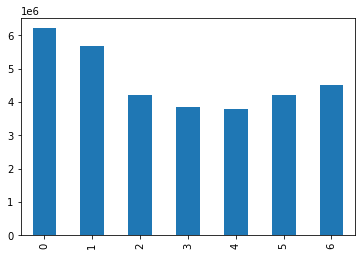

In [4]:
# prints bar chart for orders_day_of _week
orders_products_departments_final['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

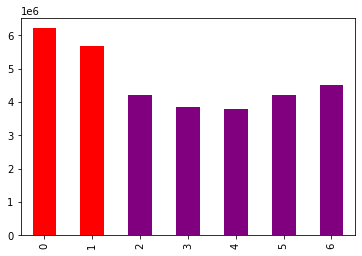

In [8]:
# prints bar chart for orders_day_of _week with color
orders_products_departments_final['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red', 'red', 'purple', 'purple', 'purple', 'purple', 'purple'])

Text(0, 0.5, 'Order Count')

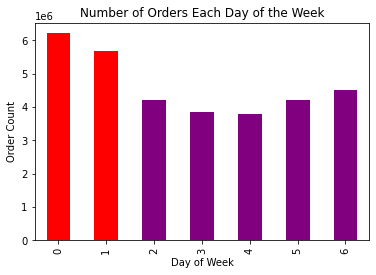

In [9]:
# exporta bar chart
bar = orders_products_departments_final['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red', 'red', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.title('Number of Orders Each Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Order Count')

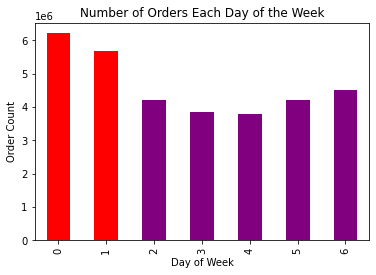

In [10]:
# returns bar chart
bar.figure

In [11]:
#saves bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

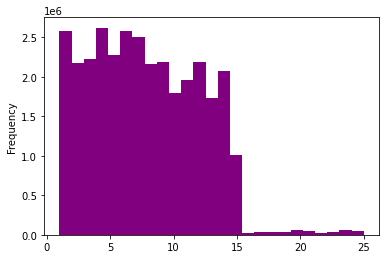

In [12]:
# Creating Histograms and Scatterplots 
#creates histogram
orders_products_departments_final['prices'].plot.hist(bins =25, color = ['purple'])

<AxesSubplot:xlabel='age', ylabel='income'>

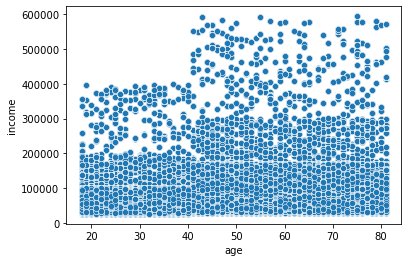

In [13]:
#creates scatterplot
sns.scatterplot(data = orders_products_departments_final, x = 'age', y = 'income')

Text(0, 0.5, 'Count')

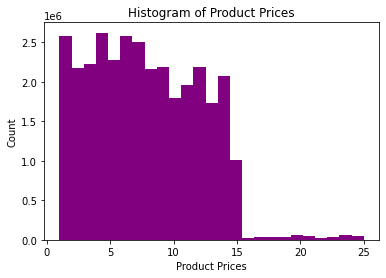

In [14]:
# creates new histogram
hist = orders_products_departments_final['prices'].plot.hist(bins = 25, color = ['purple'])
plt.title('Histogram of Product Prices')
plt.xlabel('Product Prices')
plt.ylabel('Count')

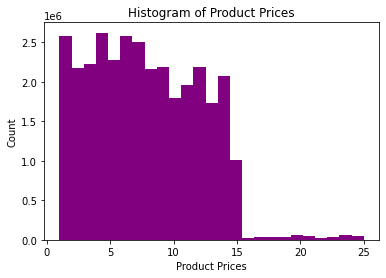

In [15]:
# returns histogram
hist.figure

In [16]:
# saves histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist.png'))

In [17]:
# Creating Line Plots & Samples
#create a seed
np.random.seed(4)

In [18]:
#create a random sample of data for 70%
dev = np.random.rand(len(orders_products_departments_final))<=.70

In [19]:
# returns dev
dev

array([False,  True, False, ...,  True, False,  True])

In [20]:
# creates big df sample 
big = orders_products_departments_final[dev]

In [21]:
# creates small df sample
small = orders_products_departments_final[~dev]

In [22]:
# creates new version of small df with only needed columns
df_2 = small[['orders_day_of_week', 'prices']]

Text(0, 0.5, 'Price')

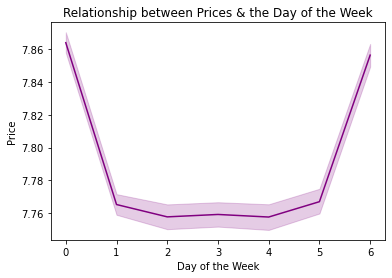

In [23]:
# returns line plot
line =sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices', color = 'purple')
plt.title('Relationship between Prices & the Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Price')

In [24]:
# saves line plot 
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_dow.png'))

In [25]:
# returns dimensions of small df 
small.shape

(9729386, 32)

In [26]:
# returns dimensions of big df
big.shape

(22703644, 32)

In [27]:
# returns dimensions of whole df
orders_products_departments_final.shape

(32433030, 32)

In [28]:
#checks to make sure bu & small df cover all data in orders_products_merge df
len(big)+len(small)

32433030

# 3. Histogram for order_hour_of_day
## You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Order Count')

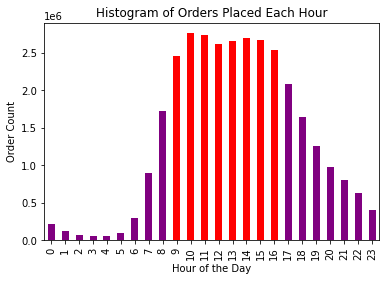

In [29]:
# creates histogram for the number of orders that occur each hour
hour_of_day_hist = orders_products_departments_final['order_hour_of_day'].value_counts().sort_index(ascending = True).plot.bar(color = ['purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.title('Histogram of Orders Placed Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')

# The histogram demostrates that the busiest hours of the day tend to fall between typical work hours (9am-5pm)

# 4. Bar Chart of Loyalty Flag
## The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

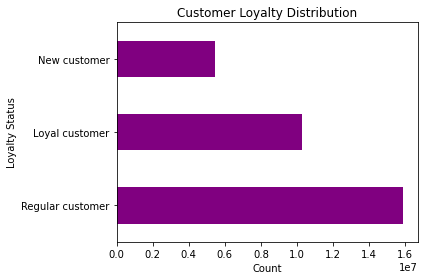

In [30]:
# creates bar chart for loyalty flag
loyalty_bar = orders_products_departments_final['loyalty_flag'].value_counts().plot.barh(color = 'purple')
plt.title('Customer Loyalty Distribution')
plt.xlabel('Count')
plt.ylabel('Loyalty Status')
plt.tight_layout()

# 5. Difference in Expenditure Depending on the Hour of Day
## Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [31]:
#creates seed
np.random.seed(3)

In [32]:
# creates dev variable needed to break df into samples
dev = np.random.rand(len(orders_products_departments_final))<=.70

In [33]:
# returns dev boolean values
dev

array([ True, False,  True, ...,  True,  True,  True])

In [34]:
# creates big df
big = orders_products_departments_final[dev]

In [35]:
# creates small df
small = orders_products_departments_final[~dev]

In [36]:
# creates new df from small with only needed cols
df_2 = small[['order_hour_of_day', 'prices']]

In [37]:
# returns small df dimensions
small.shape

(9730360, 32)

In [38]:
# returns big df dimensions
big.shape

(22702670, 32)

In [39]:
#checks to make sure small & big df cover all data in order_products_merge df
len(small)+len(big)

32433030

Text(0, 0.5, 'Price')

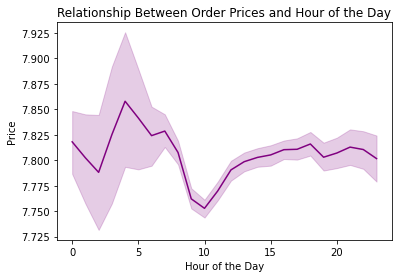

In [40]:
#creates line plot for the prices of the orders that happen each hour
hour_of_day_prices = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices', color = 'purple')
plt.title('Relationship Between Order Prices and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Price')

# There is a difference in price expedenture by each hour. Prices begin climbing around 10am. from 12 am until the early morning the margin of error is greater, probably due to less purchases being made at these times.

# 6. Family status investigation
## Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

Text(0, 0.5, 'Number of Dependants')

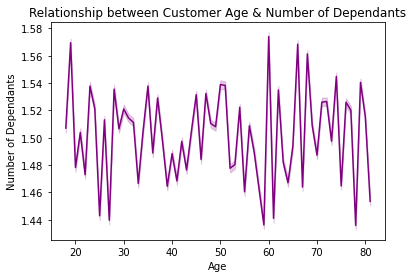

In [41]:
# creates line plot of age & number of dependants
Age_dependants_line = sns.lineplot(data = orders_products_departments_final, x = 'age', y = 'number_of_dependants', color = 'purple') 
plt.title('Relationship between Customer Age & Number of Dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')

# there does not seem to be a strong connection between age & number of dependants. This makes sense because adults of all age ranges have children. 

# 7. Age & Spending Power Relationship
## Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

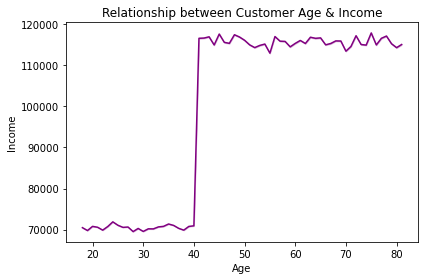

In [42]:
# plots the relationship between Age & Income
Age_Income_line = sns.lineplot(data = orders_products_departments_final, x = 'age', y = 'income', color = 'purple')
plt.title('Relationship between Customer Age & Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()

# There is a relationship between spending power of age & spending power. After the age of 40, spending power greatly increases. 

# 8. Save Charts
## Export your visualizations as “.png” files in your relevant project folder.


In [43]:
Age_Income_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_Income_line.png'))

In [44]:
hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_of_day_prices.png'))

In [45]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [46]:
hour_of_day_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_of_day_hist.png'))

In [47]:
Age_dependants_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_dependants_line.png'))